<a href="https://colab.research.google.com/github/sahanirambukpitiya/Temperature-Prediction/blob/main/Solution_174128V.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stats
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import datasets
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
data_set = pd.read_csv('/content/gdrive/My Drive/ML/Data/weatherHistory.csv')
data_set.head(10)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
5,2006-04-01 05:00:00.000 +0200,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,Partly cloudy throughout the day.
6,2006-04-01 06:00:00.000 +0200,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.
7,2006-04-01 07:00:00.000 +0200,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.
8,2006-04-01 08:00:00.000 +0200,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37,Partly cloudy throughout the day.
9,2006-04-01 09:00:00.000 +0200,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279.0,9.9820,0.0,1017.22,Partly cloudy throughout the day.


In [ ]:
data_set.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [ ]:
data_set.info

<bound method DataFrame.info of                       Formatted Date  ...                           Daily Summary
0      2006-04-01 00:00:00.000 +0200  ...       Partly cloudy throughout the day.
1      2006-04-01 01:00:00.000 +0200  ...       Partly cloudy throughout the day.
2      2006-04-01 02:00:00.000 +0200  ...       Partly cloudy throughout the day.
3      2006-04-01 03:00:00.000 +0200  ...       Partly cloudy throughout the day.
4      2006-04-01 04:00:00.000 +0200  ...       Partly cloudy throughout the day.
...                              ...  ...                                     ...
96448  2016-09-09 19:00:00.000 +0200  ...  Partly cloudy starting in the morning.
96449  2016-09-09 20:00:00.000 +0200  ...  Partly cloudy starting in the morning.
96450  2016-09-09 21:00:00.000 +0200  ...  Partly cloudy starting in the morning.
96451  2016-09-09 22:00:00.000 +0200  ...  Partly cloudy starting in the morning.
96452  2016-09-09 23:00:00.000 +0200  ...  Partly cloudy starting 

In [ ]:
df = pd.DataFrame(data_set, columns=data_set.columns)
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [ ]:
# calculate duplicates
duplicates = df.duplicated()
print(duplicates.any())

True


In [ ]:
# display the duplicate rows
print(df[duplicates])

                      Formatted Date  ...                                      Daily Summary
36072  2010-08-02 00:00:00.000 +0200  ...  Partly cloudy starting in the afternoon contin...
36073  2010-08-02 01:00:00.000 +0200  ...  Partly cloudy starting in the afternoon contin...
36074  2010-08-02 02:00:00.000 +0200  ...  Partly cloudy starting in the afternoon contin...
36075  2010-08-02 03:00:00.000 +0200  ...  Partly cloudy starting in the afternoon contin...
36076  2010-08-02 04:00:00.000 +0200  ...  Partly cloudy starting in the afternoon contin...
36077  2010-08-02 05:00:00.000 +0200  ...  Partly cloudy starting in the afternoon contin...
36078  2010-08-02 06:00:00.000 +0200  ...  Partly cloudy starting in the afternoon contin...
36079  2010-08-02 07:00:00.000 +0200  ...  Partly cloudy starting in the afternoon contin...
36080  2010-08-02 08:00:00.000 +0200  ...  Partly cloudy starting in the afternoon contin...
36081  2010-08-02 09:00:00.000 +0200  ...  Partly cloudy starting in t

In [ ]:
# delete duplicate rows
df.drop_duplicates(inplace=True)
# reset indexes 
df = df.reset_index(drop=True)

In [ ]:
df.info

<bound method DataFrame.info of                       Formatted Date  ...                           Daily Summary
0      2006-04-01 00:00:00.000 +0200  ...       Partly cloudy throughout the day.
1      2006-04-01 01:00:00.000 +0200  ...       Partly cloudy throughout the day.
2      2006-04-01 02:00:00.000 +0200  ...       Partly cloudy throughout the day.
3      2006-04-01 03:00:00.000 +0200  ...       Partly cloudy throughout the day.
4      2006-04-01 04:00:00.000 +0200  ...       Partly cloudy throughout the day.
...                              ...  ...                                     ...
96424  2016-09-09 19:00:00.000 +0200  ...  Partly cloudy starting in the morning.
96425  2016-09-09 20:00:00.000 +0200  ...  Partly cloudy starting in the morning.
96426  2016-09-09 21:00:00.000 +0200  ...  Partly cloudy starting in the morning.
96427  2016-09-09 22:00:00.000 +0200  ...  Partly cloudy starting in the morning.
96428  2016-09-09 23:00:00.000 +0200  ...  Partly cloudy starting 

In [ ]:
df.nunique()

Formatted Date              96429
Summary                        27
Precip Type                     2
Temperature (C)              7574
Apparent Temperature (C)     8984
Humidity                       90
Wind Speed (km/h)            2484
Wind Bearing (degrees)        360
Visibility (km)               949
Loud Cover                      1
Pressure (millibars)         4979
Daily Summary                 214
dtype: int64

In [ ]:
# drop formatted date column
df = df.drop(columns='Formatted Date', axis=1)

In [ ]:
# drop daily summary column
df = df.drop(columns='Daily Summary', axis=1)

In [ ]:
# drop Loud Cover column
df = df.drop(columns='Loud Cover', axis=1)

In [ ]:
df.shape

(96429, 9)

In [ ]:
# Check whether any missing values are available
df.isnull().values.any()

True

In [ ]:
# Check whether all the values are missing
df.isnull().values.all()

False

In [ ]:
# check the count of each column's null values 
df.isnull().sum()

Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
dtype: int64

In [ ]:
# total count of the null values
df.isnull().sum().sum()

517

In [ ]:
# missing percentage
missing_percentage = (df.isnull().sum() * 100 / len(df))
missing_percentage

Summary                     0.000000
Precip Type                 0.536146
Temperature (C)             0.000000
Apparent Temperature (C)    0.000000
Humidity                    0.000000
Wind Speed (km/h)           0.000000
Wind Bearing (degrees)      0.000000
Visibility (km)             0.000000
Pressure (millibars)        0.000000
dtype: float64

In [ ]:
df['Precip Type']

0        rain
1        rain
2        rain
3        rain
4        rain
         ... 
96424    rain
96425    rain
96426    rain
96427    rain
96428    rain
Name: Precip Type, Length: 96429, dtype: object

In [ ]:
df['Precip Type'].value_counts()

rain    85200
snow    10712
Name: Precip Type, dtype: int64

In [ ]:
# since the percentage is very low, drop the missing values
new_df = df.copy()
new_df = new_df.dropna(axis=0)
new_df = new_df.reset_index(drop=True)

In [ ]:
new_df.isnull().sum()

Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Pressure (millibars)        0
dtype: int64

In [ ]:
new_df.info

<bound method DataFrame.info of              Summary Precip Type  ...  Visibility (km)  Pressure (millibars)
0      Partly Cloudy        rain  ...          15.8263               1015.13
1      Partly Cloudy        rain  ...          15.8263               1015.63
2      Mostly Cloudy        rain  ...          14.9569               1015.94
3      Partly Cloudy        rain  ...          15.8263               1016.41
4      Mostly Cloudy        rain  ...          15.8263               1016.51
...              ...         ...  ...              ...                   ...
95907  Partly Cloudy        rain  ...          16.1000               1014.36
95908  Partly Cloudy        rain  ...          15.5526               1015.16
95909  Partly Cloudy        rain  ...          16.1000               1015.66
95910  Partly Cloudy        rain  ...          16.1000               1015.95
95911  Partly Cloudy        rain  ...          15.5204               1016.16

[95912 rows x 9 columns]>

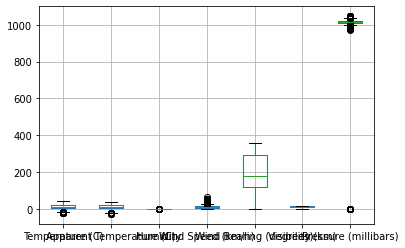

In [ ]:
new_df.boxplot()

In [ ]:
columns = ['Temperature (C)','Apparent Temperature (C)','Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Visibility (km)','Pressure (millibars)']
print(columns)

['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']


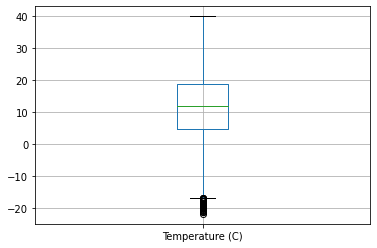

In [ ]:
# Check any outliers in the dataset under each feature
temp_df = pd.DataFrame(new_df, columns=[columns[0]])
temp_df.boxplot()

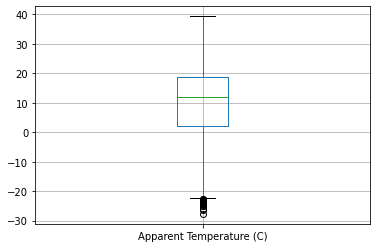

In [ ]:
# Check any outliers in the dataset under each feature
temp_df = pd.DataFrame(new_df, columns=[columns[1]])
temp_df.boxplot()

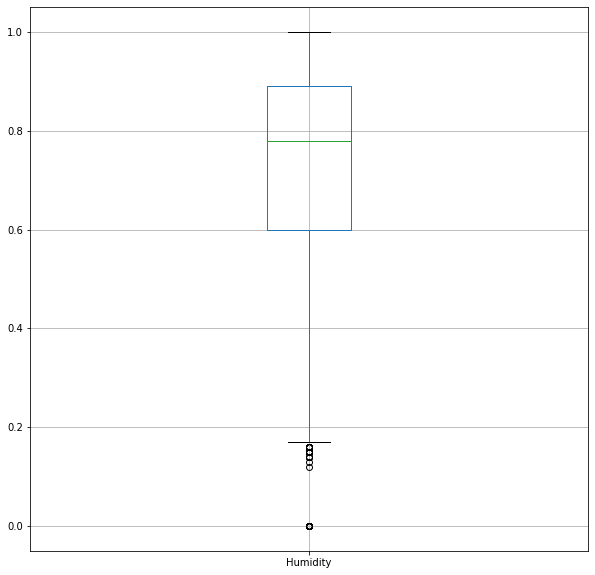

In [ ]:
# Check any outliers in the dataset under each feature
temp_df = pd.DataFrame(new_df, columns=[columns[2]])
temp_df.boxplot(figsize=(10,10))

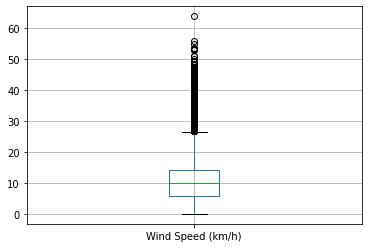

In [ ]:
# Check any outliers in the dataset under each feature
temp_df = pd.DataFrame(new_df, columns=[columns[3]])
temp_df.boxplot()

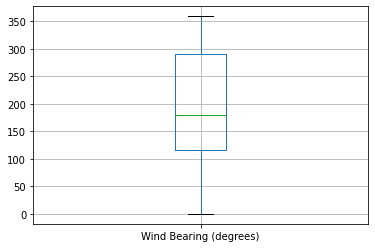

In [ ]:
# Check any outliers in the dataset under each feature
temp_df = pd.DataFrame(new_df, columns=[columns[4]])
temp_df.boxplot()

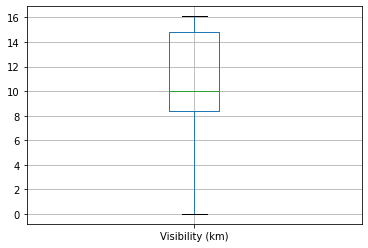

In [ ]:
# Check any outliers in the dataset under each feature
temp_df = pd.DataFrame(new_df, columns=[columns[5]])
temp_df.boxplot()

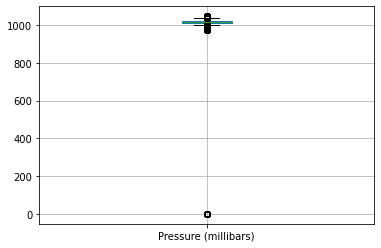

In [ ]:
# Check any outliers in the dataset under each feature
temp_df = pd.DataFrame(new_df, columns=[columns[6]])
temp_df.boxplot()

In [ ]:
# dropping outliers
df2 =new_df.drop(new_df[new_df['Pressure (millibars)'] < 200].index)
print("Before Shape:",new_df.shape)
print("After Shape:",df2.shape)

# replace new dataset with previous and reset indexes
new_df = df2;
new_df = new_df.reset_index(drop=True)

Before Shape: (95912, 9)
After Shape: (94624, 9)


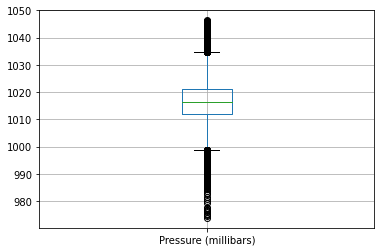

In [ ]:
temp_df = pd.DataFrame(new_df, columns=[columns[6]])
temp_df.boxplot()

In [ ]:
new_df.info

<bound method DataFrame.info of              Summary Precip Type  ...  Visibility (km)  Pressure (millibars)
0      Partly Cloudy        rain  ...          15.8263               1015.13
1      Partly Cloudy        rain  ...          15.8263               1015.63
2      Mostly Cloudy        rain  ...          14.9569               1015.94
3      Partly Cloudy        rain  ...          15.8263               1016.41
4      Mostly Cloudy        rain  ...          15.8263               1016.51
...              ...         ...  ...              ...                   ...
94619  Partly Cloudy        rain  ...          16.1000               1014.36
94620  Partly Cloudy        rain  ...          15.5526               1015.16
94621  Partly Cloudy        rain  ...          16.1000               1015.66
94622  Partly Cloudy        rain  ...          16.1000               1015.95
94623  Partly Cloudy        rain  ...          15.5204               1016.16

[94624 rows x 9 columns]>

In [ ]:
# Put the target (apparent temperature) in another DataFrame
target = pd.DataFrame(new_df, columns=["Apparent Temperature (C)"])
target.head(10)

,Apparent Temperature (C)
0,7.388889
1,7.227778
2,9.377778
3,5.944444
4,6.977778
5,7.111111
6,5.522222
7,6.527778
8,10.822222
9,13.772222


In [ ]:
# define the data/predictors as the pre-set feature names  
new_df = new_df.drop('Apparent Temperature (C)', 1)
new_df.head()

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,Partly Cloudy,rain,9.472222,0.89,14.1197,251.0,15.8263,1015.13
1,Partly Cloudy,rain,9.355556,0.86,14.2646,259.0,15.8263,1015.63
2,Mostly Cloudy,rain,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,Partly Cloudy,rain,8.288889,0.83,14.1036,269.0,15.8263,1016.41
4,Mostly Cloudy,rain,8.755556,0.83,11.0446,259.0,15.8263,1016.51


In [ ]:
X = new_df.copy() #dataset has been copied to  X
y_true = target
X.head(10)

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,Partly Cloudy,rain,9.472222,0.89,14.1197,251.0,15.8263,1015.13
1,Partly Cloudy,rain,9.355556,0.86,14.2646,259.0,15.8263,1015.63
2,Mostly Cloudy,rain,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,Partly Cloudy,rain,8.288889,0.83,14.1036,269.0,15.8263,1016.41
4,Mostly Cloudy,rain,8.755556,0.83,11.0446,259.0,15.8263,1016.51
5,Partly Cloudy,rain,9.222222,0.85,13.9587,258.0,14.9569,1016.66
6,Partly Cloudy,rain,7.733333,0.95,12.3648,259.0,9.9820,1016.72
7,Partly Cloudy,rain,8.772222,0.89,14.1519,260.0,9.9820,1016.84
8,Partly Cloudy,rain,10.822222,0.82,11.3183,259.0,9.9820,1017.37
9,Partly Cloudy,rain,13.772222,0.72,12.5258,279.0,9.9820,1017.22


In [ ]:
y_true.head(10)

,Apparent Temperature (C)
0,7.388889
1,7.227778
2,9.377778
3,5.944444
4,6.977778
5,7.111111
6,5.522222
7,6.527778
8,10.822222
9,13.772222


In [ ]:
new_df.info

<bound method DataFrame.info of              Summary Precip Type  ...  Visibility (km)  Pressure (millibars)
0      Partly Cloudy        rain  ...          15.8263               1015.13
1      Partly Cloudy        rain  ...          15.8263               1015.63
2      Mostly Cloudy        rain  ...          14.9569               1015.94
3      Partly Cloudy        rain  ...          15.8263               1016.41
4      Mostly Cloudy        rain  ...          15.8263               1016.51
...              ...         ...  ...              ...                   ...
94619  Partly Cloudy        rain  ...          16.1000               1014.36
94620  Partly Cloudy        rain  ...          15.5526               1015.16
94621  Partly Cloudy        rain  ...          16.1000               1015.66
94622  Partly Cloudy        rain  ...          16.1000               1015.95
94623  Partly Cloudy        rain  ...          15.5204               1016.16

[94624 rows x 8 columns]>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f86c7be79d0>,
      dtype=object)

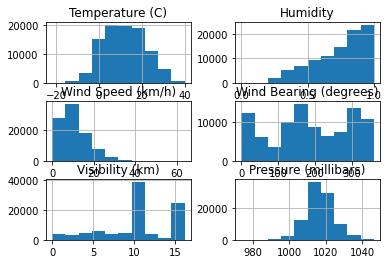

In [ ]:
#Check any Transformations are required for the dataset
X.hist()

In [ ]:
X.columns

Index(['Summary', 'Precip Type', 'Temperature (C)', 'Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
       'Pressure (millibars)'],
      dtype='object')

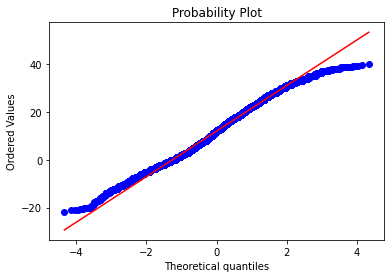

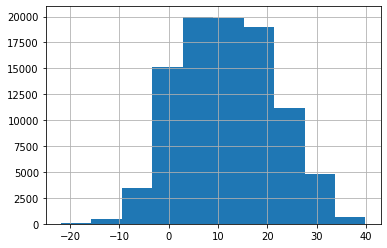

In [ ]:
# Q-Q Plot and Histogram - Temperature (C)
stats.probplot(X['Temperature (C)'], dist="norm", plot=plt);plt.show();
X['Temperature (C)'].hist();

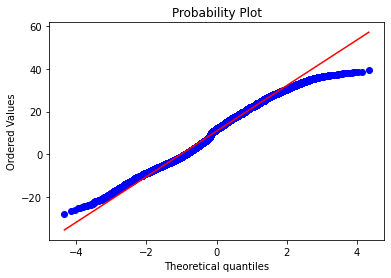

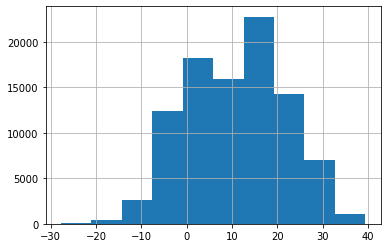

In [ ]:
# Q-Q Plot and Histogram - Apparent Temperature (C)
stats.probplot(y_true['Apparent Temperature (C)'], dist="norm", plot=plt);plt.show();
y_true['Apparent Temperature (C)'].hist();

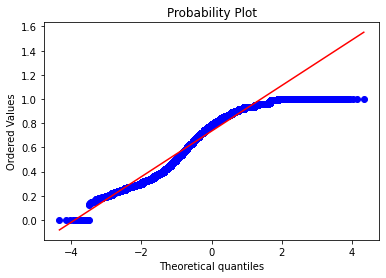

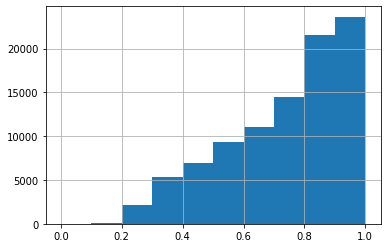

In [ ]:
# Q-Q Plot and Histogram - Humidity
stats.probplot(X['Humidity'], dist="norm", plot=plt);plt.show();
X['Humidity'].hist();

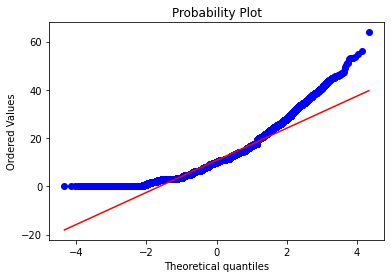

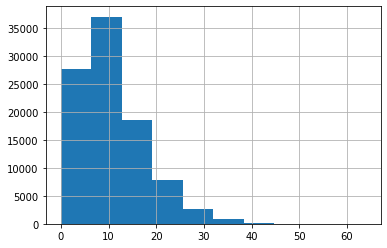

In [ ]:
# Q-Q Plot and Histogram - Wind Speed (km/h)
stats.probplot(X['Wind Speed (km/h)'], dist="norm", plot=plt);plt.show();
X['Wind Speed (km/h)'].hist();

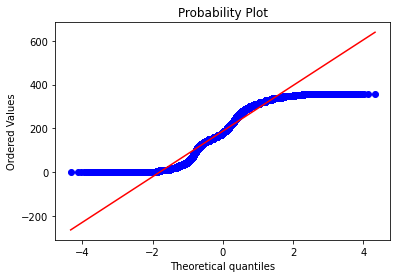

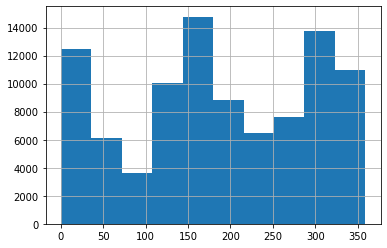

In [ ]:
# Q-Q Plot and Histogram - Wind Bearing (degrees)
stats.probplot(X['Wind Bearing (degrees)'], dist="norm", plot=plt);plt.show();
X['Wind Bearing (degrees)'].hist();

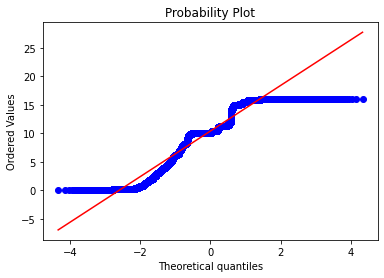

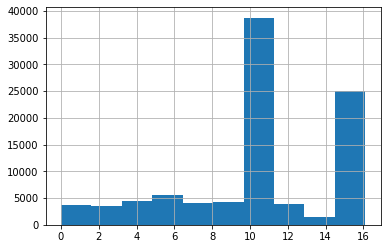

In [ ]:
# Q-Q Plot and Histogram - Visibility (km)
stats.probplot(X['Visibility (km)'], dist="norm", plot=plt);plt.show();
X['Visibility (km)'].hist();

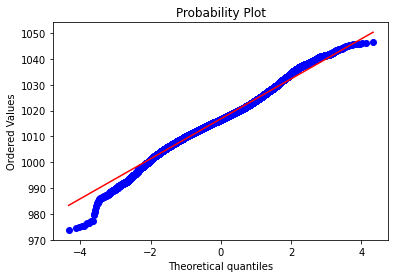

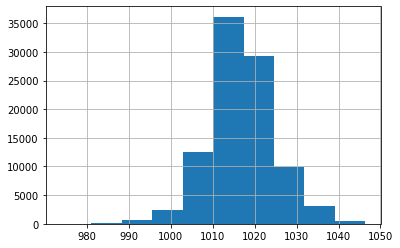

In [ ]:
# Q-Q Plot and Histogram - Pressure (millibars)
stats.probplot(X['Pressure (millibars)'], dist="norm", plot=plt);plt.show();
X['Pressure (millibars)'].hist();

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f86c7481410>,
      dtype=object)

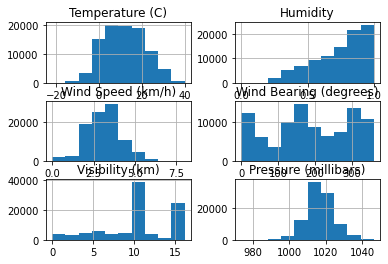

In [ ]:
# create columns variables to hold the columns that need transformation
columns = ['Wind Speed (km/h)']

# create the function transformer object with logarithm transformation
logarithm_transformer = FunctionTransformer(np.sqrt, validate=True)

# apply the transformation 
data_new = logarithm_transformer.transform(X[columns])
df_new = pd.DataFrame(data_new, columns=columns)

# replace new values with previous data frame
X['Wind Speed (km/h)'] = df_new['Wind Speed (km/h)']

X.hist()

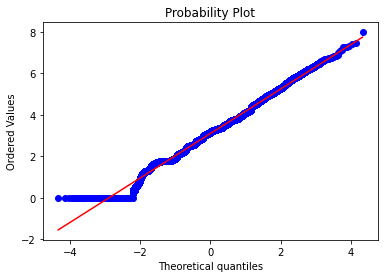

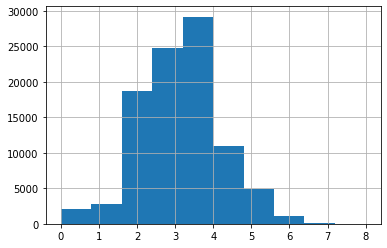

In [ ]:
# Q-Q Plot and Histogram - Wind Speed (km/h)
stats.probplot(X['Wind Speed (km/h)'], dist="norm", plot=plt);plt.show();
X['Wind Speed (km/h)'].hist();

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f86c72f2410>,
      dtype=object)

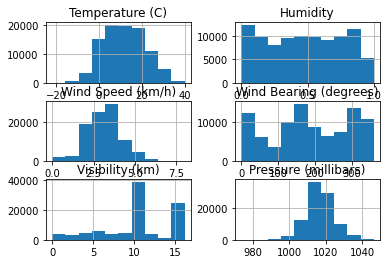

In [ ]:
# apply transformations for left skewed distributions
columns = ['Humidity']
# exponential transformation
exponential_transformer = FunctionTransformer(lambda x: x ** 3, validate=True)
# apply the transformation 
exp_data = exponential_transformer.transform(X[columns])
exp_df = pd.DataFrame(exp_data, columns=columns)
# replace new values with previous data frame
X['Humidity'] = exp_df['Humidity']
X.hist()

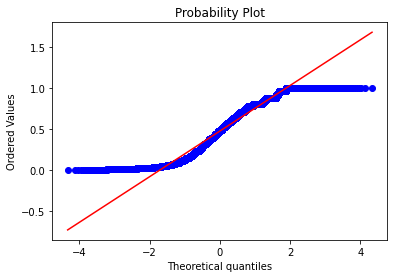

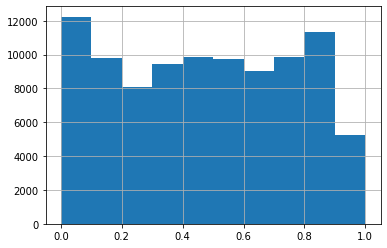

In [ ]:
# Q-Q Plot and Histogram - Humidity
stats.probplot(X['Humidity'], dist="norm", plot=plt);plt.show();
X['Humidity'].hist();

In [ ]:
X.head()

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,Partly Cloudy,rain,9.472222,0.704969,3.757619,251.0,15.8263,1015.13
1,Partly Cloudy,rain,9.355556,0.636056,3.776851,259.0,15.8263,1015.63
2,Mostly Cloudy,rain,9.377778,0.704969,1.982019,204.0,14.9569,1015.94
3,Partly Cloudy,rain,8.288889,0.571787,3.755476,269.0,15.8263,1016.41
4,Mostly Cloudy,rain,8.755556,0.571787,3.323342,259.0,15.8263,1016.51


In [ ]:
X.nunique()

Summary                     27
Precip Type                  2
Temperature (C)           7569
Humidity                    90
Wind Speed (km/h)         2472
Wind Bearing (degrees)     360
Visibility (km)            949
Pressure (millibars)      4970
dtype: int64

In [ ]:
X.dtypes

Summary                    object
Precip Type                object
Temperature (C)           float64
Humidity                  float64
Wind Speed (km/h)         float64
Wind Bearing (degrees)    float64
Visibility (km)           float64
Pressure (millibars)      float64
dtype: object

In [ ]:
X['Summary'].value_counts()

Partly Cloudy                          31506
Mostly Cloudy                          27780
Overcast                               16361
Clear                                  10018
Foggy                                   7019
Breezy and Overcast                      525
Breezy and Mostly Cloudy                 511
Breezy and Partly Cloudy                 379
Dry and Partly Cloudy                     86
Light Rain                                63
Windy and Partly Cloudy                   63
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Dry                                       34
Windy and Mostly Cloudy                   34
Breezy                                    30
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Humid and Overcast                         7
Windy and 

In [ ]:
X['Precip Type'].value_counts()

rain    84092
snow    10532
Name: Precip Type, dtype: int64

In [ ]:
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')

# fit the data
enc.fit(X[['Summary']])
cols = enc.get_feature_names()
enc_df = pd.DataFrame(enc.transform(X[['Summary']]).toarray(),columns=cols)

X = X.join(enc_df)

In [ ]:
X.head()

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),x0_Breezy,x0_Breezy and Dry,x0_Breezy and Foggy,x0_Breezy and Mostly Cloudy,x0_Breezy and Overcast,x0_Breezy and Partly Cloudy,x0_Clear,x0_Dangerously Windy and Partly Cloudy,x0_Drizzle,x0_Dry,x0_Dry and Mostly Cloudy,x0_Dry and Partly Cloudy,x0_Foggy,x0_Humid and Mostly Cloudy,x0_Humid and Overcast,x0_Humid and Partly Cloudy,x0_Light Rain,x0_Mostly Cloudy,x0_Overcast,x0_Partly Cloudy,x0_Rain,x0_Windy,x0_Windy and Dry,x0_Windy and Foggy,x0_Windy and Mostly Cloudy,x0_Windy and Overcast,x0_Windy and Partly Cloudy
0,Partly Cloudy,rain,9.472222,0.704969,3.757619,251.0,15.8263,1015.13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Partly Cloudy,rain,9.355556,0.636056,3.776851,259.0,15.8263,1015.63,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Mostly Cloudy,rain,9.377778,0.704969,1.982019,204.0,14.9569,1015.94,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Partly Cloudy,rain,8.288889,0.571787,3.755476,269.0,15.8263,1016.41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Mostly Cloudy,rain,8.755556,0.571787,3.323342,259.0,15.8263,1016.51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Convert to categorical type, then assign categorical codes to the attributes
X['Precip Type'] = X['Precip Type'].astype('category').cat.codes
X.dtypes

Summary                                    object
Precip Type                                  int8
Temperature (C)                           float64
Humidity                                  float64
Wind Speed (km/h)                         float64
Wind Bearing (degrees)                    float64
Visibility (km)                           float64
Pressure (millibars)                      float64
x0_Breezy                                 float64
x0_Breezy and Dry                         float64
x0_Breezy and Foggy                       float64
x0_Breezy and Mostly Cloudy               float64
x0_Breezy and Overcast                    float64
x0_Breezy and Partly Cloudy               float64
x0_Clear                                  float64
x0_Dangerously Windy and Partly Cloudy    float64
x0_Drizzle                                float64
x0_Dry                                    float64
x0_Dry and Mostly Cloudy                  float64
x0_Dry and Partly Cloudy                  float64


In [ ]:
# drop summary column
X = X.drop(columns='Summary', axis=1)
X.head()

,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),x0_Breezy,x0_Breezy and Dry,x0_Breezy and Foggy,x0_Breezy and Mostly Cloudy,x0_Breezy and Overcast,x0_Breezy and Partly Cloudy,x0_Clear,x0_Dangerously Windy and Partly Cloudy,x0_Drizzle,x0_Dry,x0_Dry and Mostly Cloudy,x0_Dry and Partly Cloudy,x0_Foggy,x0_Humid and Mostly Cloudy,x0_Humid and Overcast,x0_Humid and Partly Cloudy,x0_Light Rain,x0_Mostly Cloudy,x0_Overcast,x0_Partly Cloudy,x0_Rain,x0_Windy,x0_Windy and Dry,x0_Windy and Foggy,x0_Windy and Mostly Cloudy,x0_Windy and Overcast,x0_Windy and Partly Cloudy
0,0,9.472222,0.704969,3.757619,251.0,15.8263,1015.13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,9.355556,0.636056,3.776851,259.0,15.8263,1015.63,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,9.377778,0.704969,1.982019,204.0,14.9569,1015.94,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,8.288889,0.571787,3.755476,269.0,15.8263,1016.41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,8.755556,0.571787,3.323342,259.0,15.8263,1016.51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X['Precip Type'].value_counts()

0    84092
1    10532
Name: Precip Type, dtype: int64

In [ ]:
#Removing Categorical Features before the standardization
columns_value_new = ['Temperature (C)', 'Humidity','Wind Speed (km/h)', 'Visibility (km)', 'Pressure (millibars)']
columns_value_new

['Temperature (C)',
 'Humidity',
 'Wind Speed (km/h)',
 'Visibility (km)',
 'Pressure (millibars)']

In [ ]:
#Applying Standardization 
#step 1 - Calling the standard scaler
scaler = StandardScaler() 

#Transformation of other features
scaler.fit(X[columns_value_new])
X[columns_value_new] = scaler.transform(X[columns_value_new])

X.head()

,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),x0_Breezy,x0_Breezy and Dry,x0_Breezy and Foggy,x0_Breezy and Mostly Cloudy,x0_Breezy and Overcast,x0_Breezy and Partly Cloudy,x0_Clear,x0_Dangerously Windy and Partly Cloudy,x0_Drizzle,x0_Dry,x0_Dry and Mostly Cloudy,x0_Dry and Partly Cloudy,x0_Foggy,x0_Humid and Mostly Cloudy,x0_Humid and Overcast,x0_Humid and Partly Cloudy,x0_Light Rain,x0_Mostly Cloudy,x0_Overcast,x0_Partly Cloudy,x0_Rain,x0_Windy,x0_Windy and Dry,x0_Windy and Foggy,x0_Windy and Mostly Cloudy,x0_Windy and Overcast,x0_Windy and Partly Cloudy
0,0,-0.259556,0.800614,0.608787,251.0,1.302552,-0.215109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,-0.271754,0.559556,0.626625,259.0,1.302552,-0.150765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,-0.269430,0.800614,-1.038143,204.0,1.093963,-0.110872,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,-0.383277,0.334742,0.606800,269.0,1.302552,-0.050389,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,-0.334486,0.334742,0.205980,259.0,1.302552,-0.037521,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f86c6f3b690>,
      dtype=object)

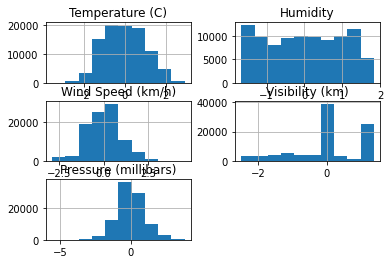

In [ ]:
X[columns_value_new].hist()

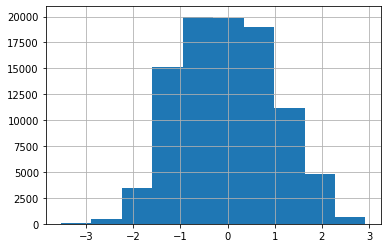

In [ ]:
# Histogram - Temperature (C)
X['Temperature (C)'].hist();

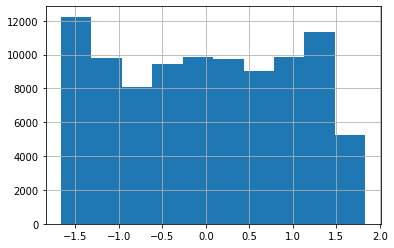

In [ ]:
# Histogram - Humidity
X['Humidity'].hist();

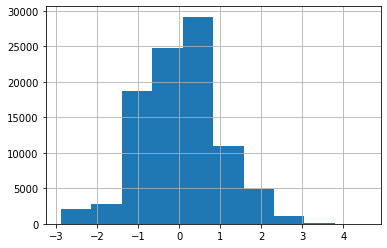

In [ ]:
# Histogram - Wind Speed (km/h)
X['Wind Speed (km/h)'].hist();

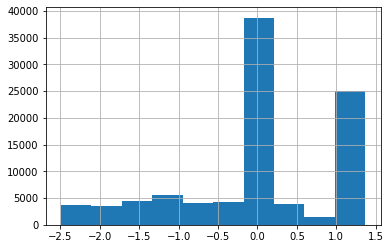

In [ ]:
# Histogram - Visibility (km)
X['Visibility (km)'].hist();

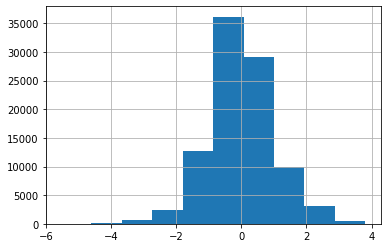

In [ ]:
# Histogram - Pressure (millibars)
X['Pressure (millibars)'].hist();

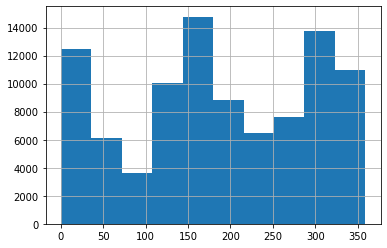

In [ ]:
X['Wind Bearing (degrees)'].hist()

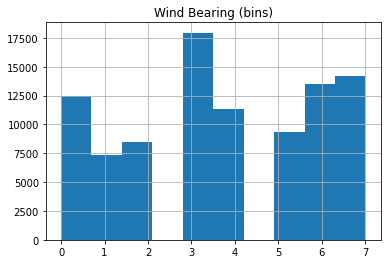

In [ ]:
data_disc = pd.DataFrame(X, columns=['Wind Bearing (degrees)'])

# fit the scaler to the  data
discretizer = KBinsDiscretizer(n_bins=8, encode='ordinal', strategy='kmeans') 
discretizer.fit(data_disc)

data_discretized = discretizer.transform(data_disc)

data_discretized = pd.DataFrame(data_discretized,columns=['Wind Bearing (bins)'])

data_discretized.hist();

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f86c42d45d0>,
      dtype=object)

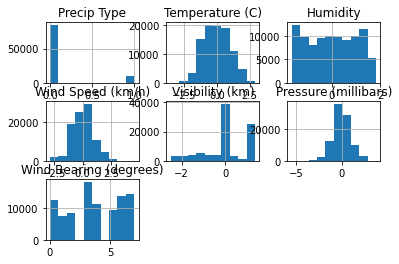

In [ ]:
columns_value_new = columns_value_new = ['Precip Type', 'Temperature (C)', 'Humidity','Wind Speed (km/h)', 'Visibility (km)', 'Pressure (millibars)', 'Wind Bearing (degrees)']
X['Wind Bearing (degrees)'] = data_discretized
X[columns_value_new].hist()

,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
Precip Type,1.000000,-0.563172,0.246431,-0.073588,-0.041313,-0.317721,0.301145
Temperature (C),-0.563172,1.000000,-0.595193,0.022391,0.029543,0.393396,-0.310378
Humidity,0.246431,-0.595193,1.000000,-0.255882,0.002845,-0.461140,0.041900
Wind Speed (km/h),-0.073588,0.022391,-0.255882,1.000000,0.116011,0.108720,-0.251721
Wind Bearing (degrees),-0.041313,0.029543,0.002845,0.116011,1.000000,0.047981,-0.077340
Visibility (km),-0.317721,0.393396,-0.461140,0.108720,0.047981,1.000000,-0.162904
Pressure (millibars),0.301145,-0.310378,0.041900,-0.251721,-0.077340,-0.162904,1.000000


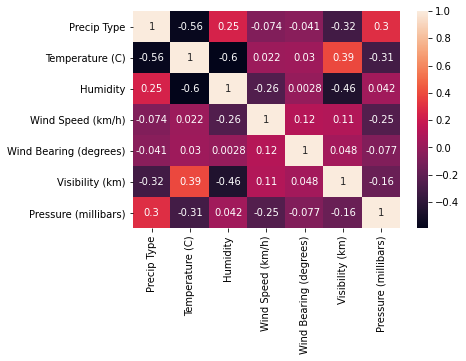

In [ ]:
# check the correlation
X1 = X.copy()
cols = ['Precip Type', 'Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']
X1 = X1[cols]
sns.heatmap(X1.corr(), annot=True)
X1.corr()

,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Apparent Temperature (C)
Precip Type,1.000000,-0.563172,0.246431,-0.073588,-0.041313,-0.317721,0.301145,-0.565426
Temperature (C),-0.563172,1.000000,-0.595193,0.022391,0.029543,0.393396,-0.310378,0.992656
Humidity,0.246431,-0.595193,1.000000,-0.255882,0.002845,-0.461140,0.041900,-0.567842
Wind Speed (km/h),-0.073588,0.022391,-0.255882,1.000000,0.116011,0.108720,-0.251721,-0.045041
Wind Bearing (degrees),-0.041313,0.029543,0.002845,0.116011,1.000000,0.047981,-0.077340,0.028974
Visibility (km),-0.317721,0.393396,-0.461140,0.108720,0.047981,1.000000,-0.162904,0.381943
Pressure (millibars),0.301145,-0.310378,0.041900,-0.251721,-0.077340,-0.162904,1.000000,-0.288173
Apparent Temperature (C),-0.565426,0.992656,-0.567842,-0.045041,0.028974,0.381943,-0.288173,1.000000


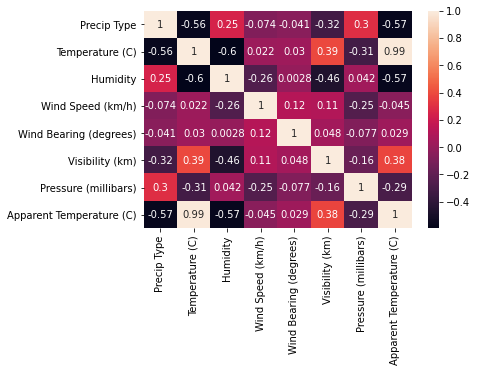

In [ ]:
#test the signifncance of the features with the target
d_data = X1.copy()
d_data['Apparent Temperature (C)'] = y_true
d_data.head(10)
sns.heatmap(d_data.corr(), annot=True) 
d_data.corr()

In [ ]:
# apply the PCA for feature reduction
pca = PCA()
pca.fit(X)
pca.explained_variance_ratio_

array([4.77614079e-01, 1.96323146e-01, 9.96890159e-02, 7.95135644e-02,
       5.74525288e-02, 2.66205216e-02, 2.44589942e-02, 1.59632133e-02,
       1.05552882e-02, 5.41403191e-03, 4.30782397e-03, 6.62926721e-04,
       4.89827913e-04, 3.83553121e-04, 1.09562236e-04, 7.16436711e-05,
       5.94505415e-05, 4.89200380e-05, 4.06252194e-05, 3.74303423e-05,
       3.47723737e-05, 3.26528770e-05, 3.21430208e-05, 2.89885158e-05,
       1.69002366e-05, 1.37604784e-05, 9.85162223e-06, 6.89186161e-06,
       3.94269505e-06, 1.10445349e-06, 9.48126084e-07, 9.48094994e-07,
       9.48004888e-07, 9.41927688e-32])

In [ ]:
# check the no of components

pca = PCA(.95)
pca.fit(X)
pca.n_components_

7

In [ ]:
pca = PCA(n_components=7)
pca.fit(X)
X_pca = pca.transform(X)

DF = pd.DataFrame(data =X_pca)
DF

,0,1,2,3,4,5,6
0,-1.369368,-0.240828,0.328436,0.098837,-1.340530,-0.846139,-0.506763
1,-1.369640,-0.353197,0.250224,0.237328,-1.265713,-0.813537,-0.378920
2,-0.255122,0.261263,-0.572614,-0.853004,-1.385721,0.696303,-0.192928
3,-1.363073,-0.384025,0.145384,0.401042,-1.238789,-0.779548,-0.206264
4,-1.339442,-0.247754,0.024666,0.150547,-1.349338,0.639592,-0.278587
...,...,...,...,...,...,...,...
94619,3.563563,-2.691589,-0.367450,0.030292,-0.064868,-0.521499,-0.055857
94620,3.586178,-2.429587,-0.443577,0.017331,-0.055616,-0.518228,-0.021881
94621,3.604887,-2.167482,-0.524362,-0.033033,-0.355554,-0.539376,0.001227
94622,3.594322,-2.100166,-0.354204,0.100792,-0.406399,-0.580343,-0.138938


In [ ]:
pca.explained_variance_ratio_

array([0.47761408, 0.19632315, 0.09968902, 0.07951356, 0.05745253,
       0.02662052, 0.02445899])

In [ ]:
# Split the data

X_df = DF

X_train, X_test, Y_train, Y_test = train_test_split(X_df, target, test_size=0.2,random_state=101)

# reset the indexes
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
Y_train = Y_train.reset_index(drop=True)
Y_test = Y_test.reset_index(drop=True)

print("X_train shape:",X_train.shape,"    y_train shape:",Y_train.shape)
print("X_test shape:",X_test.shape,"     y_test shape:", Y_test.shape)

X_train shape: (75699, 7)     y_train shape: (75699, 1)
X_test shape: (18925, 7)      y_test shape: (18925, 1)


In [ ]:
# implementing Linear Regression
lm = linear_model.LinearRegression()
model = lm.fit(X_train, Y_train)


In [ ]:
predictions = lm.predict(X_test)
y_hat = pd.DataFrame(predictions, columns=['Predicted Temperature'])
y_hat.head()

,Predicted Temperature
0,8.421553
1,-0.422459
2,13.582458
3,18.237137
4,-0.762895


In [ ]:
Y_test.head()

,Apparent Temperature (C)
0,8.688889
1,-1.550000
2,14.061111
3,18.311111
4,-1.366667


In [ ]:
# Calcualting MSE of y_hat and y
mean_squared_error(Y_test, y_hat)

1.3932665751665436

In [ ]:
#RMSE
from math import sqrt
rmse = sqrt(mean_squared_error(Y_test, y_hat))
rmse

1.1803671357533398

In [ ]:
#Percentage of explained variance of the predictions
print(lm.score(X_test,Y_test))

0.9878860954312183


In [ ]:
# W parameters of the model W value
print(lm.coef_)

[[-0.24898365 -5.63430182 -2.41632089 -3.89620307  4.57141059  0.20661109
  -6.08235427]]


In [ ]:
# Intercept of the model W0
print(lm.intercept_)

[10.88248565]


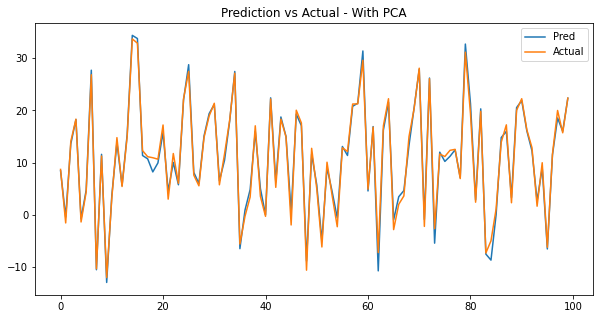

In [ ]:
# visualising
plt.figure(figsize=(10, 5))

# Limiting the data set to 100 rows for more clearance
plt.plot(y_hat[:100], label = "Pred")
plt.plot(Y_test[:100], label = "Actual")
plt.title('Prediction vs Actual - With PCA')
plt.legend()
plt.show()